# **House Price Correlation**

## Objectives

* to answer business requirement 1 - The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.

## Inputs

* the input here will be the dataset named "house_prices_record.csv" found in the "outputs/datasets/collection subset" 


## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

In [2]:
%matplotlib inline


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

# Section 1

Section 1 content

In [5]:
import pandas as pd



In [ ]:
! pip install pandas-profiling
! pip install ipywidgets

In [6]:
df = pd.read_csv('outputs/datasets/collection/house_prices_records.csv')

df.head(10)

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0       856     854.0           3.0             1         706           7.0   
1      1262       0.0           3.0             4         978           6.0   
2       920     866.0           3.0             2         486           7.0   
3       961       NaN           NaN             1         216           6.0   
4      1145       NaN           4.0             3         655           7.0   
5       796     566.0           1.0             1         732           7.0   
6      1694       0.0           3.0             3        1369           7.0   
7      1107     983.0           3.0             2         859           6.0   
8      1022     752.0           2.0             1           0           1.0   
9      1077       0.0           2.0             1         851           7.0   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...  LotFrontage  \
0        150            0.0         548           2.0  ...         65.0   
1        284            NaN         460           2.0  ...         80.0   
2        434            0.0         608           2.0  ...         68.0   
3        540            NaN         642           1.0  ...         60.0   
4        490            0.0         836           2.0  ...         84.0   
5         64            NaN         480           1.0  ...         85.0   
6        317            NaN         636           2.0  ...         75.0   
7        216            NaN         484           NaN  ...          NaN   
8        952            NaN         468           1.0  ...         51.0   
9        140            NaN         205           2.0  ...         50.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0           61            5            7          856         0.0   
1         0.0            0            8            6         1262         NaN   
2       162.0           42            5            7          920         NaN   
3         0.0           35            5            7          756         NaN   
4       350.0           84            5            8         1145         NaN   
5         0.0           30            5            5          796         NaN   
6       186.0           57            5            8         1686         NaN   
7       240.0          204            6            7         1107         NaN   
8         0.0            0            5            7          952         NaN   
9         0.0            4            6            5          991         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  
3       1915          1970     140000  
4       2000          2000     250000  
5       1993          1995     143000  
6       2004          2005     307000  
7       1973          1973     200000  
8       1931          1950     129900  
9       1939          1950     118000  

[10 rows x 24 columns]

---

In [8]:
from pandas_profiling import ProfileReport
df_report = ProfileReport(df=df, minimal=True)
df_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Section 2

Section 2 content

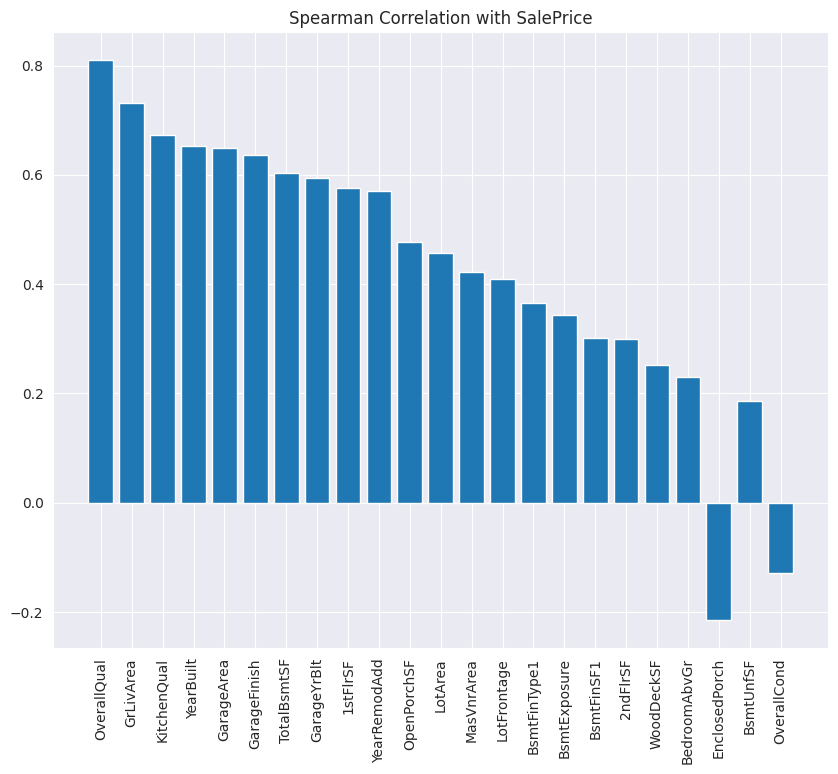

In [19]:
import matplotlib.pyplot as plt

corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(24)

plt.figure(figsize=(10,8))
plt.bar(x=corr_spearman.index, height=corr_spearman.values)
plt.title('Spearman Correlation with SalePrice')
plt.xticks(rotation=90)
plt.show()


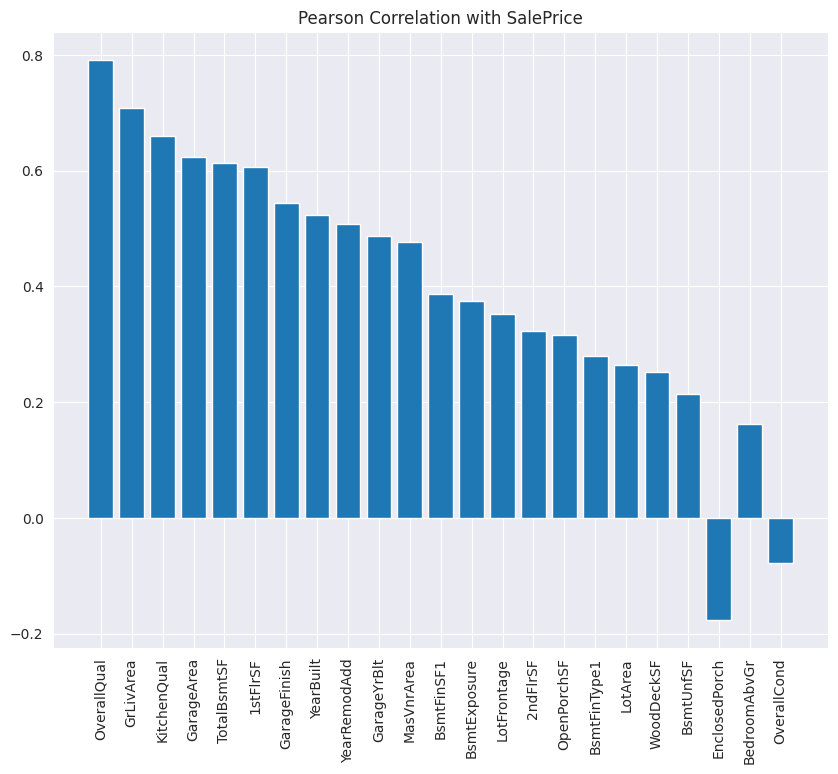

In [21]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(24)

plt.figure(figsize=(10,8))
plt.bar(x=corr_pearson.index, height=corr_pearson.values)
plt.title('Pearson Correlation with SalePrice')
plt.xticks(rotation=90)
plt.show()


In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

In [10]:
top_correlation = ['GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
top_correlation

['GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

---

# Further Investigation

In [11]:
df_eda = df.filter(top_correlation + ['SalePrice'])
df_eda.head(3)

GarageArea  GrLivArea  KitchenQual  OverallQual  TotalBsmtSF  YearBuilt  \
0         548       1710            3            7          856       2003   
1         460       1262            2            6         1262       1976   
2         608       1786            3            7          920       2001   

   SalePrice  
0     208500  
1     181500  
2     223500

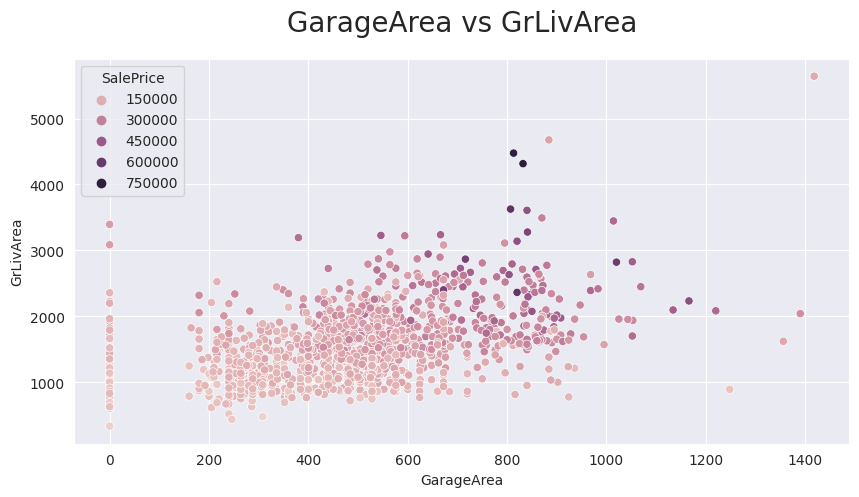

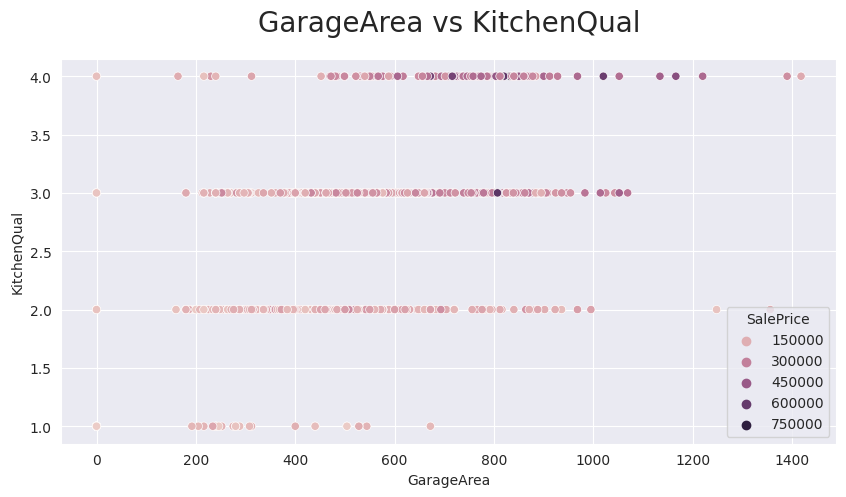

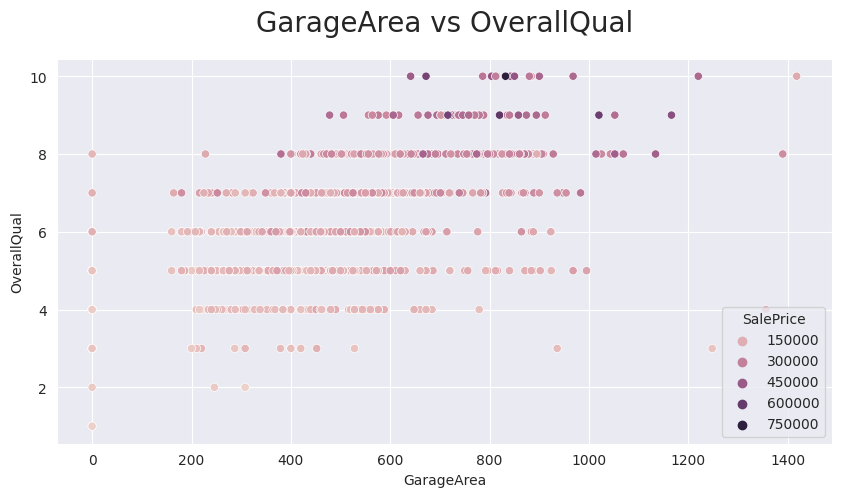

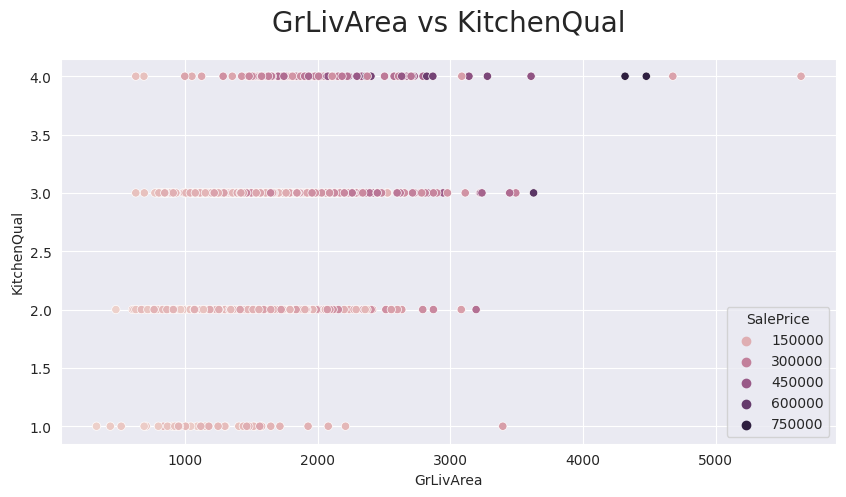

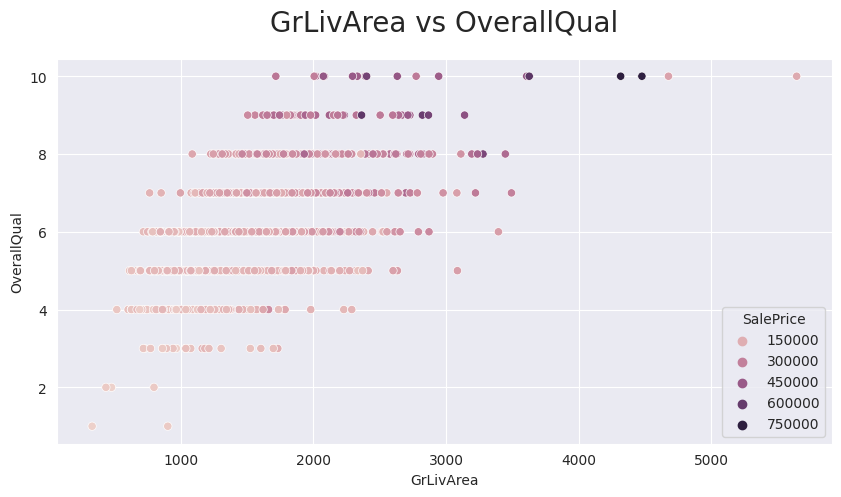

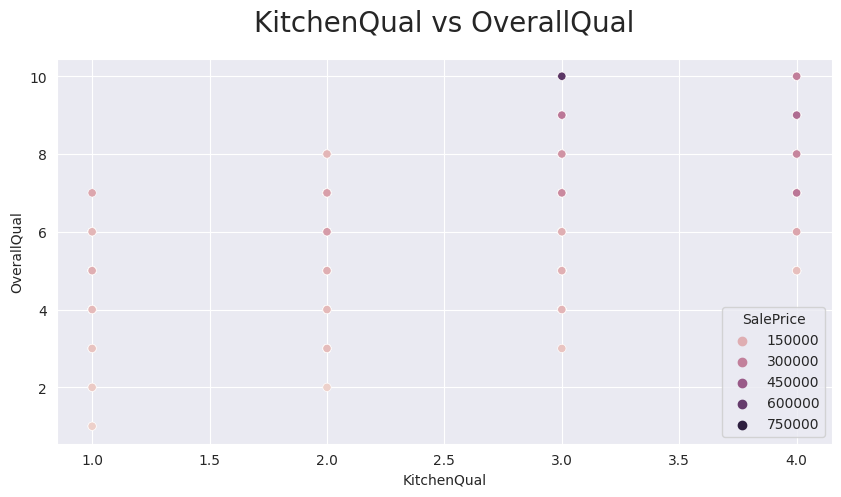

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

def plot_scatterplot(df, col1, col2, target_var):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col1, y=col2, hue=target_var)
    plt.title(f'{col1} vs {col2}', fontsize=20,y=1.05)
    plt.show()

target_var='SalePrice'
num_cols = 4
for i in range(num_cols):
    col1 = top_correlation[i]
    for j in range(i+1, num_cols):
        col2 = top_correlation[j]
        plot_scatterplot(df_eda, col1, col2, target_var)
        print("\n\n")


---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
